### Uso de MSE (Mean Squared Error) y MAE (Mean Absolute Error)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

error cuadrático medio(MSE): 2.4882
error absoluto medio(MAE): 1.3049


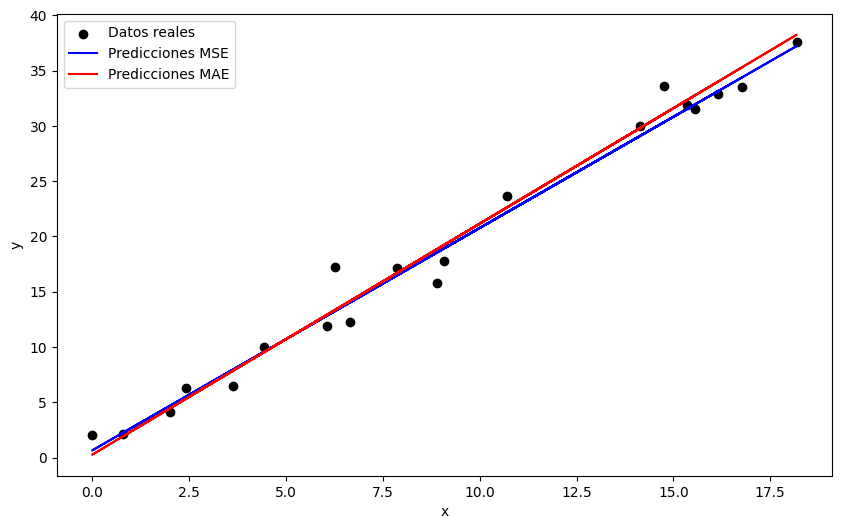

In [14]:
# Generar un conjunto de datos suntéticos
np.random.seed(42)

# Datos reales (relación lineal) con ruido añadido
x = 2 * np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 2, x.shape[0]) # y = 2x + 1 + ruido normal con media 0 y desviación estandar 2

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reformatear x para que sea del tamaño adecuado para scikit-learn
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

# Entrenar el modelo con el método de mínimos cuadrados MSE
model_mse = LinearRegression()
model_mse.fit(x_train, y_train)

# Realizar las predicciones con el modelo entrenado con MSE
y_pred_mse = model_mse.predict(x_test)

# Entrenar el modelo con el método de mínimos cuadrados MAE
model_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0)
model_mae.fit(x_train, y_train)

# Realizar las predicciones con el modelo entrenado con MAE
y_pred_mae = model_mae.predict(x_test)

# Evaluar y comparar los modelos con MSE y MAE
mse = mean_squared_error(y_test, y_pred_mse)
mae = mean_absolute_error(y_test, y_pred_mae)

# Mostrar los resultados
print(f'error cuadrático medio(MSE): {mse:.4f}')
print(f'error absoluto medio(MAE): {mae:.4f}')

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='black', label='Datos reales')
plt.plot(x_test, y_pred_mse, color='blue', label='Predicciones MSE')
plt.plot(x_test, y_pred_mae, color='red', label='Predicciones MAE')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
